# Combine Datasets

In [88]:
import pandas as pd
df3 = pd.read_csv("./datasets/merged03.txt")
df5 = pd.read_csv("./datasets/merged05.txt")
df6 = pd.read_csv("./datasets/merged06.txt")
df_all = pd.concat([df3,df5,df6]).reset_index(drop=True)
df_all

,time,mRegistered,mTimeStamp,mPci,mTac,mEarfcn,mMcc+mMnc,ss,rsrp,rsrq,activity,nextAP,handoverOccured,max_ss,max_rsrp,max_rsrq,diff_in_ss,diff_in_rsrp,diff_in_rsrq
0,11-06 17:05:27.823,YES,963103842398,116,16185,2300,310260,19,-106,-10,UNKNOWN,116.0,0,15,-114,-15,4,8,5
1,11-06 17:05:29.918,YES,965204574639,116,16185,2300,310260,21,-102,-9,UNKNOWN,116.0,0,14,-113,-14,7,11,5
2,11-06 17:05:32.381,YES,967695762231,116,16185,2300,310260,22,-106,-12,UNKNOWN,116.0,0,14,-115,-18,8,9,6
3,11-06 17:05:34.873,YES,970146334089,116,16185,2300,310260,22,-103,-12,UNKNOWN,116.0,0,16,-111,-19,6,8,7
4,11-06 17:05:36.886,YES,972200049242,116,16185,2300,310260,20,-103,-10,UNKNOWN,116.0,0,15,-113,-18,5,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3317,11-06 17:40:58.399,YES,2320504054131,370,16185,5035,310260,11,-123,-17,WALKING,370.0,0,7,-126,-18,4,3,1
3318,11-06 17:41:00.488,YES,2322576624182,370,16185,5035,310260,10,-125,-18,WALKING,370.0,0,6,-130,-18,4,5,0
3319,11-06 17:41:05.454,YES,2324979351192,370,16185,5035,310260,10,-127,-20,WALKING,370.0,0,6,-128,-17,4,1,-3
3320,11-06 17:41:07.961,YES,2327469289825,370,16185,5035,310260,9,-130,-20,WALKING,370.0,0,0,-1000,-1000,9,870,980


In [85]:
df_all['handoverOccured'].value_counts()

0    3181
1     141
Name: handoverOccured, dtype: int64

# Balance Dataset

In [89]:
pos_df_all = df_all[df_all['handoverOccured'] == 1]
neg_df_all = df_all[df_all['handoverOccured'] == 0]

In [96]:
SAMPLES_PER_CLASS = len(pos_df_all)
neg_samples = neg_df_all.sample(SAMPLES_PER_CLASS)
resampled_df = pd.concat([pos_df_all, neg_samples])
resampled_df

,time,mRegistered,mTimeStamp,mPci,mTac,mEarfcn,mMcc+mMnc,ss,rsrp,rsrq,activity,nextAP,handoverOccured,max_ss,max_rsrp,max_rsrq,diff_in_ss,diff_in_rsrp,diff_in_rsrq
142,11-06 17:13:06.968,YES,1366721945471,116,16185,2300,310260,20,-110,-17,WALKING,99.0,1,12,-113,-14,8,3,-3
154,11-06 17:14:04.621,YES,1386078954743,99,16185,2300,310260,19,-113,-18,WALKING,44.0,1,15,-107,-14,4,-6,-4
261,11-06 17:21:06.485,YES,1553086144661,44,16185,675,310260,31,-81,-20,WALKING,434.0,1,31,-76,-9,0,-5,-11
296,11-06 17:22:58.934,YES,1623956480315,434,16185,2300,310260,31,-86,-19,UNKNOWN,328.0,1,31,-74,-8,0,-12,-11
320,11-06 17:24:03.438,YES,1676989424036,328,16185,2300,310260,27,-100,-19,UNKNOWN,370.0,1,31,-73,-14,-4,-27,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,11-07 18:21:57.466,YES,24155316170855,79,16169,2300,310260,25,-98,-13,STILL,79.0,0,18,-108,-19,7,10,6
2061,11-07 18:57:37.284,YES,24583596807583,477,16175,675,310260,28,-88,-6,UNKNOWN,477.0,0,20,-103,-20,8,15,14
2158,11-07 19:03:43.696,YES,24749818045756,74,16175,2300,310260,21,-102,-11,UNKNOWN,74.0,0,27,-76,-6,-6,-26,-5
404,11-06 17:28:57.465,YES,1831172193978,171,16185,2300,310260,24,-96,-10,WALKING,171.0,0,31,-73,-14,-7,-23,4


# Create Train and Test Data

In [135]:
from sklearn.model_selection import train_test_split

X = resampled_df[["ss", "rsrq", "rsrp", "max_ss", "max_rsrp", "max_rsrq","diff_in_ss", "diff_in_rsrq", "diff_in_rsrp"]].values
y = resampled_df['handoverOccured'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [136]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0, 1]), array([94, 94])), (array([0, 1]), array([47, 47])))

# Train NN

In [137]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential(
    [
        layers.Dense(1000, activation="relu", name="layer1"),
        layers.Dense(1000, activation="relu", name="layer2"),
        layers.Dense(1000, activation="relu", name="layer3"),
        layers.Dense(1000, activation="relu", name="layer4"),
        layers.Dense(1, activation="sigmoid", name="layer5"),
    ]
)
# Call model on a test input
y = model(X[0:2])

In [163]:
model.compile(
    optimizer=keras.optimizers.RMSprop(
        learning_rate=0.000001
    ),  # Optimizer
    # Loss function to minimize
    loss="binary_crossentropy",
    metrics=["accuracy"] # tf.keras.metrics.Recall(), tf.keras.metrics.Precision()
)

In [164]:
history = model.fit(
    X_train,
    y_train,
    batch_size=10,
    epochs=40,
    validation_data=(X_test, y_test)
)

Epoch 1/40
19/19 [==============================] - 1s 39ms/step - loss: 2.6896 - accuracy: 0.5000 - val_loss: 1.8840 - val_accuracy: 0.5000
Epoch 2/40
19/19 [==============================] - 1s 29ms/step - loss: 1.9439 - accuracy: 0.5000 - val_loss: 1.3730 - val_accuracy: 0.5000
Epoch 3/40
19/19 [==============================] - 1s 28ms/step - loss: 1.4221 - accuracy: 0.5000 - val_loss: 0.9875 - val_accuracy: 0.5957
Epoch 4/40
19/19 [==============================] - 1s 29ms/step - loss: 1.0683 - accuracy: 0.4787 - val_loss: 0.8015 - val_accuracy: 0.5957
Epoch 5/40
19/19 [==============================] - 1s 30ms/step - loss: 0.8553 - accuracy: 0.4681 - val_loss: 0.6935 - val_accuracy: 0.6489
Epoch 6/40
19/19 [==============================] - 1s 30ms/step - loss: 0.7105 - accuracy: 0.5745 - val_loss: 0.6591 - val_accuracy: 0.6702
Epoch 7/40
19/19 [==============================] - 1s 33ms/step - loss: 0.6541 - accuracy: 0.6755 - val_loss: 0.6706 - val_accuracy: 0.7021
Epoch 8/40
19

In [165]:
import matplotlib.pyplot as plt
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

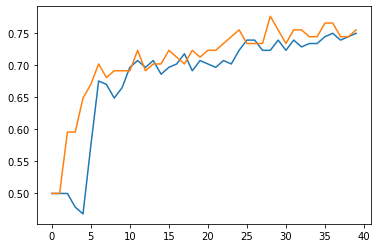

In [166]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])